In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import time as time

In [ ]:
#veriseti baglantısı
parkinsons_data = pd.read_csv('/content/ReplicatedAcousticFeatures-ParkinsonDatabase.csv')

FileNotFoundError: ignored

In [ ]:
#5 satiri yazdirip icerige bakildi
parkinsons_data.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [ ]:
#kac satir ve sutun olduguna bakildi
parkinsons_data.shape

(240, 48)

In [ ]:
#veri setinin analizi icin bilgiler getirildi
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          240 non-null    object 
 1   Recording   240 non-null    int64  
 2   Status      240 non-null    int64  
 3   Gender      240 non-null    int64  
 4   Jitter_rel  240 non-null    float64
 5   Jitter_abs  240 non-null    float64
 6   Jitter_RAP  240 non-null    float64
 7   Jitter_PPQ  240 non-null    float64
 8   Shim_loc    240 non-null    float64
 9   Shim_dB     240 non-null    float64
 10  Shim_APQ3   240 non-null    float64
 11  Shim_APQ5   240 non-null    float64
 12  Shi_APQ11   240 non-null    float64
 13  HNR05       240 non-null    float64
 14  HNR15       240 non-null    float64
 15  HNR25       240 non-null    float64
 16  HNR35       240 non-null    float64
 17  HNR38       240 non-null    float64
 18  RPDE        240 non-null    float64
 19  DFA         240 non-null    f

In [ ]:
# veri setinin icindeki eksik degerler tespit edildi
parkinsons_data.isnull().sum()

ID            0
Recording     0
Status        0
Gender        0
Jitter_rel    0
Jitter_abs    0
Jitter_RAP    0
Jitter_PPQ    0
Shim_loc      0
Shim_dB       0
Shim_APQ3     0
Shim_APQ5     0
Shi_APQ11     0
HNR05         0
HNR15         0
HNR25         0
HNR35         0
HNR38         0
RPDE          0
DFA           0
PPE           0
GNE           0
MFCC0         0
MFCC1         0
MFCC2         0
MFCC3         0
MFCC4         0
MFCC5         0
MFCC6         0
MFCC7         0
MFCC8         0
MFCC9         0
MFCC10        0
MFCC11        0
MFCC12        0
Delta0        0
Delta1        0
Delta2        0
Delta3        0
Delta4        0
Delta5        0
Delta6        0
Delta7        0
Delta8        0
Delta9        0
Delta10       0
Delta11       0
Delta12       0
dtype: int64

In [ ]:
#kac adet ID var bulundu
parkinsons_data.ID.nunique()

80

In [ ]:
#verilerin istatiksel degerlerini aldik max,min..
parkinsons_data.describe()

,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.500000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,...,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144
std,0.818203,0.501045,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,...,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819
min,1.000000,0.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,...,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411
25%,1.000000,0.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012910,...,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559
50%,2.000000,0.500000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,...,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212
75%,3.000000,1.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,...,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235
max,3.000000,1.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,...,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103


In [ ]:
#cift kayit var mi kontrol edildi
parkinsons_data.duplicated().sum()

0

In [ ]:
# statusa gore islem yapilsin - ID ve status uygulamaya dahil edilmesin
X=parkinsons_data
y=parkinsons_data['Status']
X=X.drop(columns=["Status",'ID'])
print(X.shape,y.shape)

(240, 46) (240,)


1  --> Parkinson Hastasi

0 --> Saglıklı


In [ ]:
#hasta ve saglıklı kac durum var
parkinsons_data.Status.value_counts()

0    120
1    120
Name: Status, dtype: int64

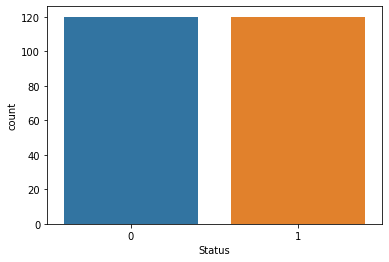

In [ ]:
#durumun grafigi
sns.countplot(x="Status", data=parkinsons_data)

In [ ]:
parkinsons_data.Status.value_counts()

0    120
1    120
Name: Status, dtype: int64

In [ ]:

print(str((120/(120+120))*100) + '% Parkinson Hastası Birey')

50.0% Parkinson Hastası Birey


In [ ]:
# hasta ve saglıklı olanlar duruma (status) göre gruplandırıldı
parkinsons_data.groupby('Status').mean()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
Status,,,,,,,,,,,,,,,,,,,,,
0,2.0,0.45,0.482186,0.000040,0.002486,0.002787,0.032928,0.287586,0.018054,0.019978,...,1.453583,1.460161,1.451821,1.446357,1.456511,1.444688,1.453727,1.441393,1.472436,1.457309
1,2.0,0.35,0.685788,0.000049,0.003858,0.004277,0.043928,0.386079,0.024945,0.026959,...,1.232892,1.237667,1.223613,1.237214,1.225279,1.243267,1.229217,1.221474,1.220326,1.234979


In [ ]:
#iki sınıf arası bosluk arttırılır
ran_under=TomekLinks(sampling_strategy='azinlik olmayan')
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 120, 1: 109})


In [ ]:
#veriseti dengeli hale getirme
ran_over = RandomOverSampler(sampling_strategy='minority',random_state=1)
X_over, y_over = ran_over.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 120, 1: 120})


In [ ]:
#veriseti dengeleme
ran_under = RandomUnderSampler(sampling_strategy='majority',random_state=1)
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 120, 1: 120})


In [ ]:
park_over=X_over.copy()
park_over['Status']=y_over
park_under=X_under.copy()
park_under['Status']=y_under

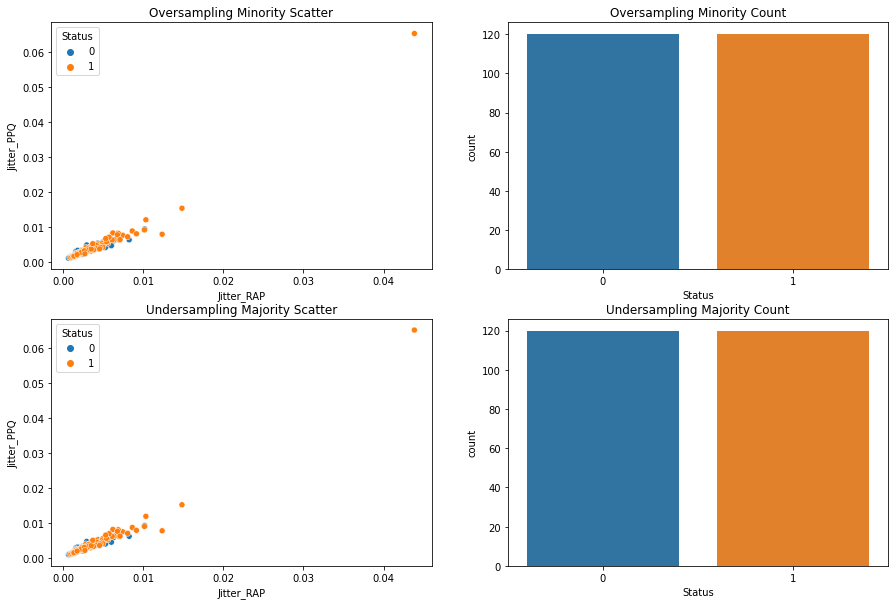

In [ ]:
figure, axis = plt.subplots(2, 2,figsize=(15,10))

sns.scatterplot(ax=axis[0,0],data=park_over,x='Jitter_RAP',y='Jitter_PPQ',hue='Status')
axis[0, 0].set_title("Oversampling Minority Scatter")

sns.countplot(ax=axis[0, 1],x="Status", data=park_over)
axis[0, 1].set_title("Oversampling Minority Count")

sns.scatterplot(ax=axis[1, 0],data=park_under,x='Jitter_RAP',y='Jitter_PPQ',hue='Status')
axis[1, 0].set_title("Undersampling Majority Scatter")

sns.countplot(ax=axis[1, 1],x="Status", data=park_under)
axis[1, 1].set_title("Undersampling Majority Count")
plt.show()

In [ ]:
park_over.duplicated().sum()

0

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=1)
X_smote, y_smote= sm.fit_resample(X, y)
print(Counter(y_smote))

Counter({0: 120, 1: 120})


In [ ]:
X_smote.columns

Index(['Recording', 'Gender', 'Jitter_rel', 'Jitter_abs', 'Jitter_RAP',
       'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3', 'Shim_APQ5',
       'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA',
       'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5',
       'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12',
       'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4', 'Delta5', 'Delta6',
       'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11', 'Delta12'],
      dtype='object')

In [ ]:
park_smote=X_smote.copy()
park_smote['Status']=y_smote

[Text(0.5, 1.0, 'SMOTE Count')]

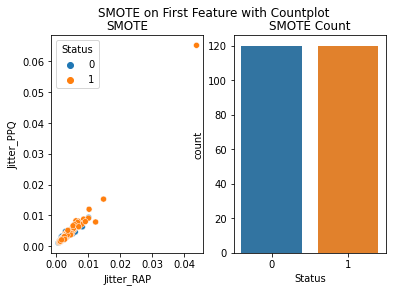

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('SMOTE on First Feature with Countplot')
sns.scatterplot(ax=ax1,data=park_smote,x='Jitter_RAP',y='Jitter_PPQ',hue='Status').set(title='SMOTE')
sns.countplot(ax=ax2,x="Status", data=park_smote).set(title='SMOTE Count')

In [ ]:
cols=X_smote.columns

In [ ]:
norm_smote=pd.DataFrame(preprocessing.normalize(X_smote),columns=cols)
norm_over=pd.DataFrame(preprocessing.normalize(X_over),columns=cols)
norm_under=pd.DataFrame(preprocessing.normalize(X_under),columns=cols)

In [ ]:
scale_under=pd.DataFrame(preprocessing.scale(X_under),columns=cols)
scale_over=pd.DataFrame(preprocessing.scale(X_over),columns=cols)
scale_smote=pd.DataFrame(preprocessing.scale(X_smote),columns=cols)

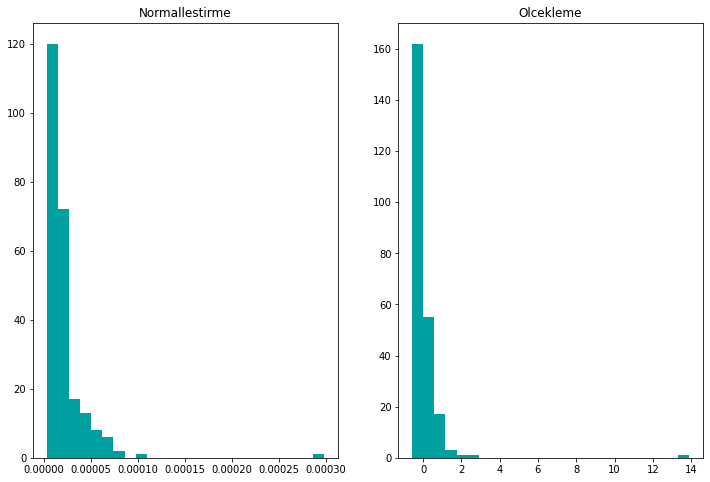

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].hist(norm_smote['Jitter_RAP'], bins = 25, color = '#00A0A0')
axs[0].title.set_text('Normallestirme')
axs[1].hist(scale_smote['Jitter_PPQ'], bins = 25, color = '#00A0A0')
axs[1].title.set_text('Olcekleme')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(240, 46) (192, 46) (48, 46)


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 1.23598654 -0.81826965 -0.23851362 ... -0.3907332  -0.27454441
  -0.18805506]
 [ 1.23598654 -0.81826965 -0.69822393 ...  0.62691712  0.7693934
  -0.20046911]
 [ 1.23598654 -0.81826965 -0.418101   ...  0.62598958  0.21048959
  -0.25817647]
 ...
 [-1.22317838 -0.81826965 -0.54842873 ...  0.15720606  0.11204293
   0.51020838]
 [-1.22317838  1.22209103 -0.31071706 ... -0.04807389  0.22128297
   0.05863647]
 [-1.22317838 -0.81826965  1.8436014  ... -1.30117712 -0.72365215
  -0.9632208 ]]


In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Egitim verilerinin dogruluk derecesi : ', training_data_accuracy)

Egitim verilerinin dogruluk derecesi :  0.90625


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Test verilerinin dogruluk derecesi : ', test_data_accuracy)

Test verilerinin dogruluk derecesi :  0.7083333333333334


In [ ]:
input_data = (1,0,1.6448,0.0001444,0.010153,0.0090937,0.083889,0.72901,0.048767,0.049748,0.057234,43.45710078,47.36107079,58.84008002,64.40114139,66.28290227,0.476412854,0.670279868,0.629180551,0.869918017,1.317719515,1.142050546,1.118315049,1.389429618,1.196776802,1.119816909,1.339750817,1.193893841,1.10012353,1.191333445,1.22167721,1.03299902,1.133471487,1.277402158,1.100026267,1.312853391,1.204035717,1.104822179,1.197922999,1.163285533,1.11239988,1.234032439,1.131826928,1.067379475,1.194269713,1.14080069

)


# girdiler diziye cevrildi
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("Kisi Saglıklı")

else:
  print("Kisi Parkinson")


[1]
Kisi Parkinson


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!git init
!git add .  # Tüm dosyaları ekler
!git commit -m "İlk commit"  # Değişiklikleri taahhüt eder
!git branch -M main  # Ana dalı oluşturur (varsayılan olarak "main" kullanılır)
!git remote add origin <https://github.com/iremcing9/Parkinson-sDiseaseDetect-onWithColab/import>  # GitHub repository URL'sini ekler
!git push -u origin main  # Kodu GitHub'a yükler


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@12d741c81c2a.(none)')
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git remote add origin <https://github